In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib.image import imread as imr
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score, f1_score

In [2]:
# set display option

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

## KNN (K-Nearest Neighbor)

`K-nearest neighbor is a machine learning algorithm which can be used for both classification and regression problems.` <br><br>
`KNN is a non-parametric type of algorithm it means it does not learn any parameter` <br>
`KNN is very expensive because it stores the training data and use it for the testing/prediction` <br>
`KNN is lazy algorithm because it does the calculation at the time of prediction`

#### Points to be remember while using KNN
* `The data size should be reasonable but not too large` <br>
* `Target data should be balanced` <br>
* `Data should be dense and low dimensional`

#### Classification Steps
> 1) `Choose K number of neighbors` <br>
> 2) `Take K-nearest neighbor of the new data point according to the euclidean distance or any other distance` <br>
> 3) `Among these k-neighbors, count the number of data points in each categories` <br>
> 4) `Assign the new data point to the category where you counted most of the neighbors`

`For regression problem it takes the average of the target of the nearest neighbors.`

#### Distance Methods
> **1. Euclidean Distance:** <br> `It is also known as L2-Norm`
>> * `It is calculated as square root of summation of squared distance between 2 points.` <br>
>> * `It takes the squared distance.` <br>
>> * `It works better when the data is continuous.`

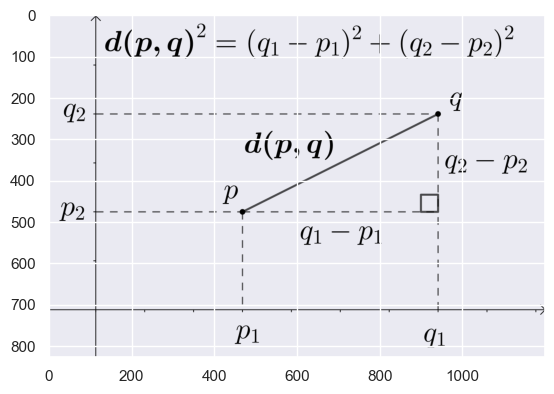

In [4]:
plt.imshow(imr("../Images/pythagorean.png"));

* `Suppose, there are two points p and q as given in above figure which are located at (p1, p2) and (q1,q2) respectively. Now, to calculate distance between p and q using euclidean distance we use pythogorean rule. It is calculated as-`
>> `Square root of summation of squared difference between their respective points, in this case, q1-p1 and q2-p2`

<br><br>

* `Suppose, there are two points A and B at location (x1,x2) and (y1,y2) then we can calculate their distance using euclidean distance i.e. L2-Norm as following-`

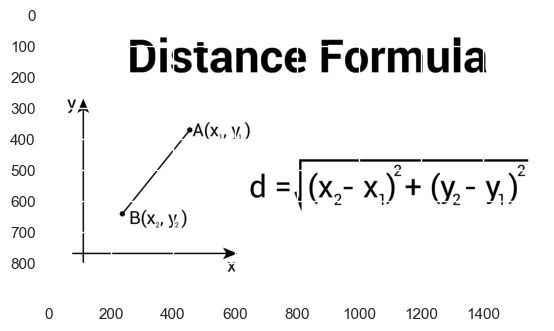

In [5]:
plt.imshow(imr("../Images/euclidean2.jpg"));

#### When to use Euclidean Distance

* `When features are continous like -`
> `Example -` <br> `Height, Weight, Temperature`
* `Works well when all features have equal importance.` <br>

#### Issues with Euclidean Distance

* `Sensitive to different scale of the data` <br>
* `Does not work well with high dimensionality`

### Euclidean from scratch for single observation and multiple features

In [2]:
# import necessary libraries 
import numpy as np

# Euclidean Distance Implementation from Scratch
def euclidean_distance(point1, point2):
    """
    Compute the Euclidean distance between two N-dimensional points.
   
    :param point1: List or array representing first point (e.g., [x1, y1, z1, ...])
    :param point2: List or array representing second point (e.g., [x2, y2, z2, ...])
    :return: Euclidean distance between point1 and point2
    """
    point1, point2 = np.array(point1), np.array(point2)  # Ensure inputs are NumPy arrays
    return np.sqrt(np.sum((point1 - point2) ** 2))  # Apply Euclidean formula

# Test the function with simple 2D and 3D points
p1_2d, p2_2d = [3, 4], [7, 1]  # 2D points
p1_3d, p2_3d = [1, 2, 3], [4, 6, 8]  # 3D points

euclidean_2d = euclidean_distance(p1_2d, p2_2d)
euclidean_3d = euclidean_distance(p1_3d, p2_3d)

euclidean_2d, euclidean_3d

(np.float64(5.0), np.float64(7.0710678118654755))

#### Compare Euclidean distance under different conditions:
* 1️⃣ `Works well in low dimensions (2D & 3D examples).`
* 2️⃣ `Fails in high dimensions (Curse of Dimensionality).`
* 3️⃣ `Fails when features have different scales (Feature Scaling Issue).`

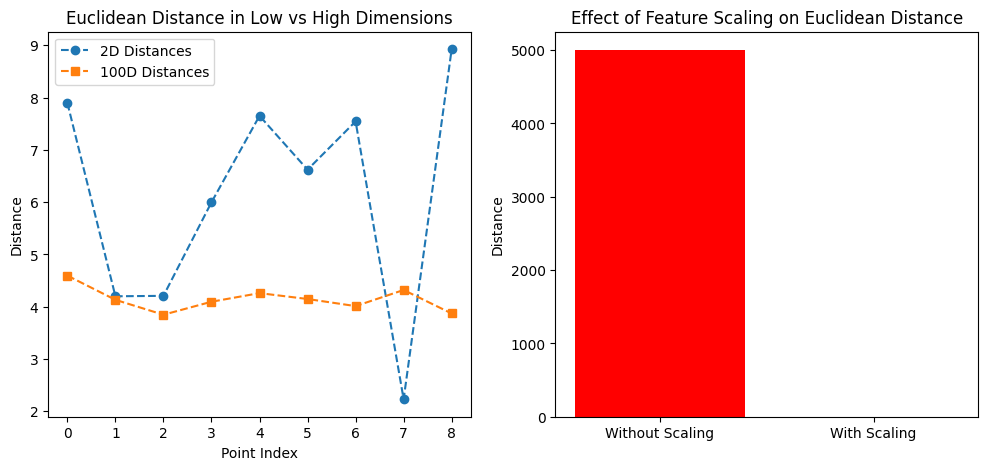

5000.000099999999 1.7320508075688772


In [3]:
# euclidean_distance method use kiya hai uppar ke code se, don't get confused ki kaha se aaya h

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1️⃣ Works well in low dimensions
low_dim_points = np.random.rand(10, 2) * 10  # 10 points in 2D space
distances_2d = [euclidean_distance(low_dim_points[i], low_dim_points[i+1]) for i in range(9)]

# 2️⃣ Fails in high dimensions (Curse of Dimensionality)
high_dim_points = np.random.rand(10, 100)  # 10 points in 100D space
distances_high_dim = [euclidean_distance(high_dim_points[i], high_dim_points[i+1]) for i in range(9)]

# 3️⃣ Fails with different scales (Feature Scaling Issue)
raw_data = np.array([[1, 5000], [2, 10000], [3, 15000]])  # One small feature, one large
scaled_data = StandardScaler().fit_transform(raw_data)  # Standardized version
raw_dist = euclidean_distance(raw_data[0], raw_data[1])  # Without scaling
scaled_dist = euclidean_distance(scaled_data[0], scaled_data[1])  # With scaling

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 2D vs 100D Comparison
ax[0].plot(distances_2d, label="2D Distances", marker="o", linestyle="--")
ax[0].plot(distances_high_dim, label="100D Distances", marker="s", linestyle="--")
ax[0].set_title("Euclidean Distance in Low vs High Dimensions")
ax[0].set_xlabel("Point Index")
ax[0].set_ylabel("Distance")
ax[0].legend()

# Feature Scaling Issue
ax[1].bar(["Without Scaling", "With Scaling"], [raw_dist, scaled_dist], color=["red", "blue"])
ax[1].set_title("Effect of Feature Scaling on Euclidean Distance")
ax[1].set_ylabel("Distance")

plt.show()

print(raw_dist, scaled_dist)  # Display actual distances for feature scaling comparison

### Step 2: Practical Comparisons – Where Euclidean Works and Fails

#### ✅ Works Well in Low Dimensions (2D, 3D)
`The left graph shows 2D distances (orange) vs. 100D distances (blue).` <br>
`In 2D, Euclidean distance works fine and maintains meaningful differences.`

#### ❌ Fails in High Dimensions (Curse of Dimensionality)
`In 100D, all points have almost the same distance, making Euclidean useless.` <br>
`This is why KNN struggles in high-dimensional spaces—it can't distinguish close vs. far neighbors!`

#### ❌ Fails When Features Have Different Scales (Feature Scaling Issue)
`Without scaling, the distance between (1, 5000) and (2, 10000) was 5000.00, entirely dominated by the large feature.` <br>
`After standardization, the distance was 1.73, meaning features contributed equally.`

#### 📌 Key Takeaways 
`Always scale features before using Euclidean distance!` <br>
`Avoid using Euclidean in very high dimensions — it loses meaning.` <br>
`Avoid when many of the features are categorical.`

In [8]:
# Fails in High Dimensions (Curse of Dimensionality)

import numpy as np
import pandas as pd

# 1. Set dimension and number of points
dim = 20  # 20 features
n_points = 5

# 2. Generate a random center point
center = np.random.rand(dim)

# 3. Generate 5 other random points
points = np.random.rand(n_points, dim)

# 4. Calculate Euclidean distances
distances = np.linalg.norm(points - center, axis=1)

# 5. Create a DataFrame to show points and distances
df = pd.DataFrame(points, columns=[f"F{i+1}" for i in range(dim)])
df["Distance_to_Center"] = distances

# 6. Print the distances and range
print("Distances from 5 points to the center point:\n")
print(df[["Distance_to_Center"]])
print("\nMin:", distances.min())
print("Max:", distances.max())
print("Range (max - min):", distances.max() - distances.min())

Distances from 5 points to the center point:

   Distance_to_Center
0            1.673688
1            2.213179
2            1.887829
3            2.327818
4            1.685527

Min: 1.6736882061172027
Max: 2.327818374677743
Range (max - min): 0.6541301685605405


> **2. Manhanttan Distance\Taxi-Cab Distance:** <br> `It is also known as L1-Norm` <br>
`Unlike euclidean distance, this measures distance by only moving horizontally and vertically like taxi driving in a city grid.` 
>> `It is calculated as the summation of the absolute distance between 2 or more points.` <br>
>> `It takes absolute distance.`

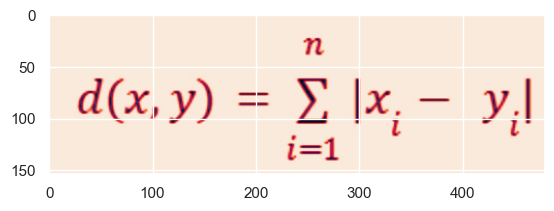

In [9]:
plt.imshow(imr("../Images/manhantan1.jpg"));

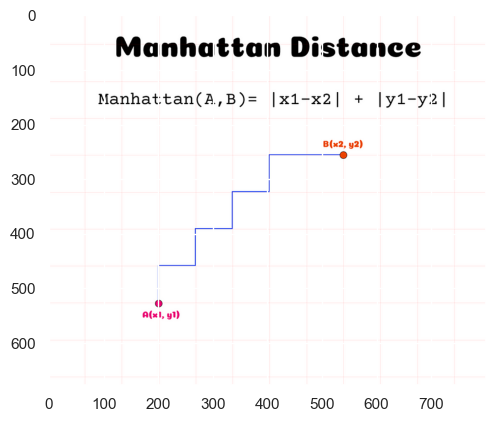

In [10]:
plt.imshow(imr("../Images/manhantan.png"));

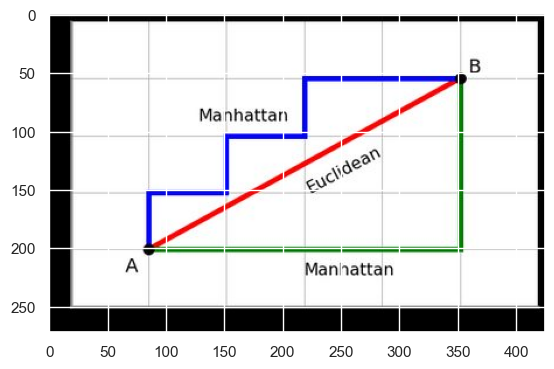

In [11]:
plt.imshow(imr("../Images/distance1.jpeg"));

### Manhattan Distance Implementation from Scratch for single observation and multiple features

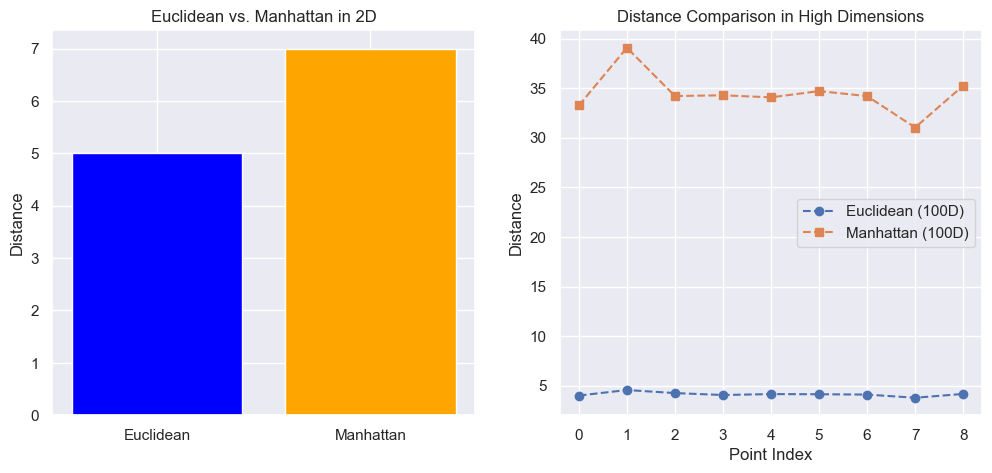

5001 2.449489742783178


In [12]:
def manhattan_distance(point1, point2):
    """
    Compute the Manhattan distance between two N-dimensional points.
   
    :param point1: List or array representing first point (e.g., [x1, y1, z1, ...])
    :param point2: List or array representing second point (e.g., [x2, y2, z2, ...])
    :return: Manhattan distance between point1 and point2
    """
    point1, point2 = np.array(point1), np.array(point2)  # Ensure inputs are NumPy arrays
    return np.sum(np.abs(point1 - point2))  # Sum of absolute differences

# 1️⃣ Compare Manhattan vs Euclidean in Low Dimensions (2D)
manhattan_2d = manhattan_distance(p1_2d, p2_2d)
euclidean_2d = euclidean_distance(p1_2d, p2_2d)

# 2️⃣ Compare in High Dimensions (100D)
distances_manhattan_high_dim = [manhattan_distance(high_dim_points[i], high_dim_points[i+1]) for i in range(9)]

# 3️⃣ Scaling Issue: Compare Manhattan before and after standardization
raw_dist_manhattan = manhattan_distance(raw_data[0], raw_data[1])  # Without scaling
scaled_dist_manhattan = manhattan_distance(scaled_data[0], scaled_data[1])  # With scaling

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Low-Dimensional Comparison
ax[0].bar(["Euclidean", "Manhattan"], [euclidean_2d, manhattan_2d], color=["blue", "orange"])
ax[0].set_title("Euclidean vs. Manhattan in 2D")
ax[0].set_ylabel("Distance")

# High-Dimensional Comparison
ax[1].plot(distances_high_dim, label="Euclidean (100D)", marker="o", linestyle="--")
ax[1].plot(distances_manhattan_high_dim, label="Manhattan (100D)", marker="s", linestyle="--")
ax[1].set_title("Distance Comparison in High Dimensions")
ax[1].set_xlabel("Point Index")
ax[1].set_ylabel("Distance")
ax[1].legend()

plt.show()

print(raw_dist_manhattan, scaled_dist_manhattan)  # Display actual distances for feature scaling comparison

#### When to use
* `When features are independent and have different scales` <br>
* `Works better in high dimentional spaces compared to euclidean diatance.` <br>
* `Good for categorical data (text based) data representation.`

#### Check behavior difference between Euclidean and Manhanttan

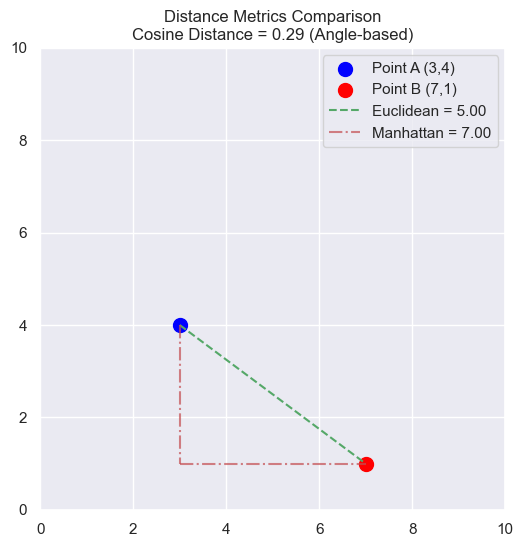

In [13]:
from scipy.spatial.distance import euclidean, cityblock, cosine
import numpy as np
import matplotlib.pyplot as plt

# Generate two sample points
point_A = np.array([3, 4])
point_B = np.array([7, 1])

# Compute distances
euclidean_dist = euclidean(point_A, point_B)
manhattan_dist = cityblock(point_A, point_B)
cosine_dist = cosine(point_A, point_B)  # Cosine similarity ranges from 0 to 1, so 1 - similarity gives distance

# Visualization
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(*point_A, color='blue', s=100, label="Point A (3,4)") # here * is extracting the values inside and passing it as single value, like here x,y
ax.scatter(*point_B, color='red', s=100, label="Point B (7,1)")

# Euclidean Distance (straight-line)
ax.plot([point_A[0], point_B[0]], [point_A[1], point_B[1]], 'g--', label=f"Euclidean = {euclidean_dist:.2f}")

# Manhattan Distance (grid path)
ax.plot([point_A[0], point_A[0]], [point_A[1], point_B[1]], 'r-.', alpha=0.7)  # Vertical move
ax.plot([point_A[0], point_B[0]], [point_B[1], point_B[1]], 'r-.', alpha=0.7, label=f"Manhattan = {manhattan_dist:.2f}")  # Horizontal move

# Labels & Legends
ax.legend()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title(f"Distance Metrics Comparison\nCosine Distance = {cosine_dist:.2f} (Angle-based)")
ax.grid(True)

plt.show()

> **3. Minkowski Distance:** <br>
`It is generalized distance metric that allows us to smoothly interpolate/shift between Manhanttan and Euclidean by adjusting a parameter r. Both Euclidean and Manhanttan distance are just special cases of minkowski.`

>> `It is calculated as rth root of summation of rth power of absolute difference between 2 points.` <br>

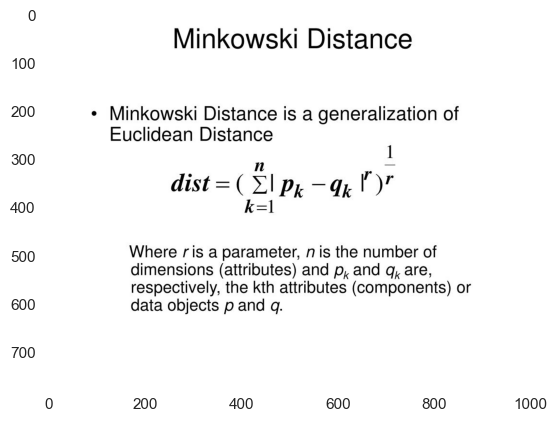

In [14]:
plt.imshow(imr(r"../Images/minkowski.jpg"))
plt.grid()
plt.show();

#### When,
* `r = 1, it becomes Manhanttan Distance` <br>
* `r = 2 it becomes Euclidean distance ` <br>
* `When you are not sure about value of r, oftenly the value of r used between 1.5 to 2` <br>

`In real life scenario many times you have to face roads which consists of diagonal and angle roads, in such scenario we cannot use just L1 or L2 norm.`

> **4. Cosine Similarity:** <br>
`Cosine similarity works based on angle based similarity instead of distance. It measures the angle between 2-vectors instead of their absolute difference`

#### Key Points
* `Two vectors pointing in same direction: High Similarity (close to 1)` <br>
* `Two vectors perpendicullar (90*): No Similarity (close to 0)` <br>
* `Two vector pointing in opposite directions: Negative Similarity (close to -1)` <br>

#### When is this useful
* `When magnitude (scale) does not matter, only direction (positive or negative) does.` <br>
* `Common in text analysis, recommendations and high dimentional sparse data.`

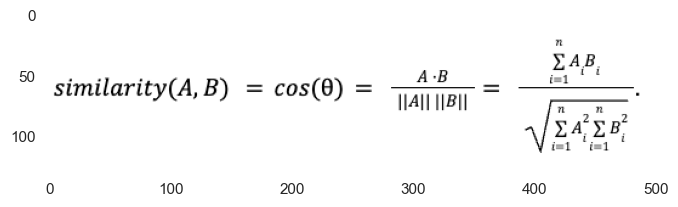

In [15]:
plt.figure(figsize= (8,8))
plt.imshow(imr(r"../Images/cosinesimilarity.png"))
plt.grid()
plt.show();

**Where**
* **A.B:** <br> `Dot product of vectors A and B` <br>
* **||A|| and ||B||:** <br> `Magnitude (length) of vectors` <br>
* **theta:** <br>`Angle between vectors.`

#### Key Property
* `Unlike Euclidean or Manhanttan distance cosine similarity ignores magnitude and focuses only on orientations/directions.`

In [16]:
A = np.array([3, 4])
B = np.array([5, 2])
C = np.array([-4, -3])
np.linalg.norm(A), np.linalg.norm(B), np.linalg.norm(C)

(np.float64(5.0), np.float64(5.385164807134504), np.float64(5.0))

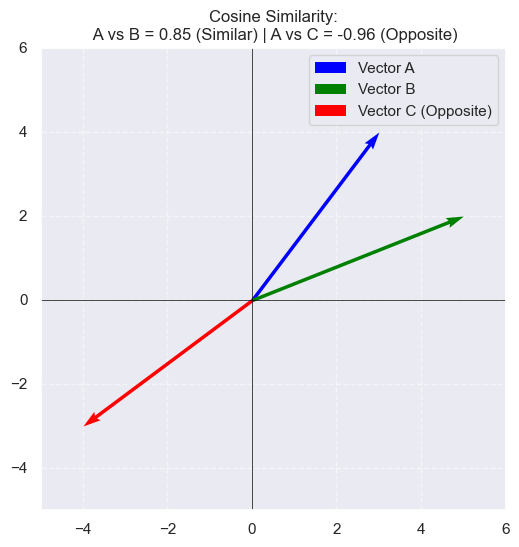

In [17]:
# Define vectors A and B in 2D space
A = np.array([3, 4])
B = np.array([5, 2])
C = np.array([-4, -3])  # Opposite direction

# Compute cosine similarity manually
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

cos_AB = cosine_similarity(A, B)  # Similar direction
cos_AC = cosine_similarity(A, C)  # Opposite direction

# Plot vectors
fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector A')
ax.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='green', label='Vector B')
ax.quiver(0, 0, C[0], C[1], angles='xy', scale_units='xy', scale=1, color='red', label='Vector C (Opposite)')

# Formatting the plot
ax.set_xlim(-5, 6)
ax.set_ylim(-5, 6)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()
ax.set_title(f"Cosine Similarity:\n A vs B = {cos_AB:.2f} (Similar) | A vs C = {cos_AC:.2f} (Opposite)")

plt.show()

#### Example Cosine Similarity

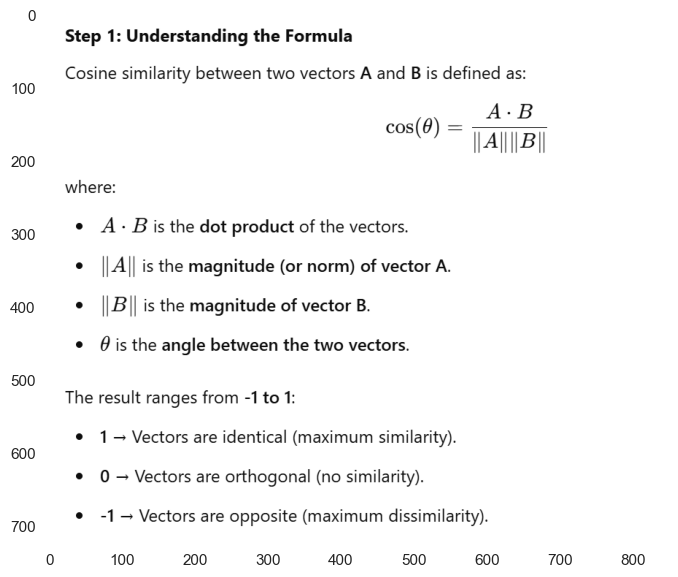

In [18]:
plt.figure(figsize= (8,8))
plt.imshow(imr(r"1.png"))
plt.grid()
plt.show();

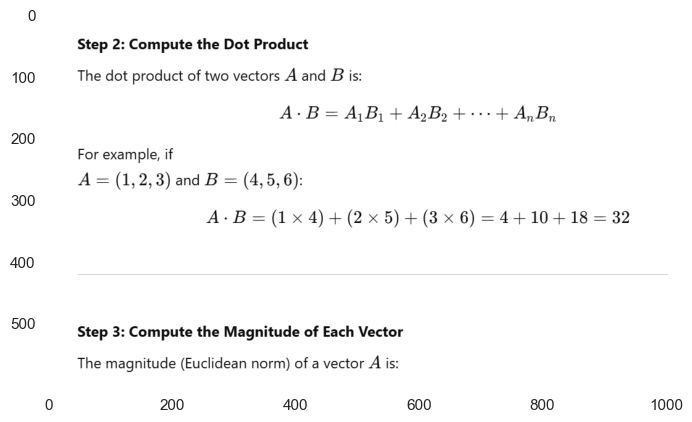

In [19]:
plt.figure(figsize= (8,8))
plt.imshow(imr(r"2.png")[:600, :])
plt.grid()
plt.show();

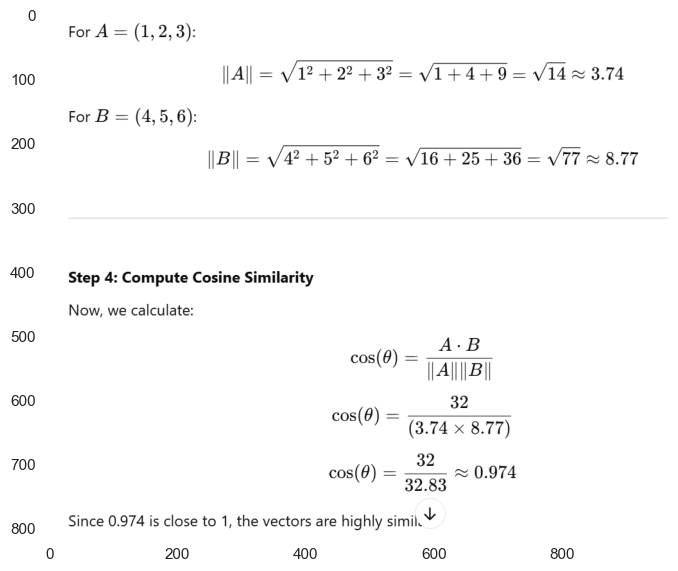

In [20]:
plt.figure(figsize= (8,8))
plt.imshow(imr(r"3.png"))
plt.grid()
plt.show();

#### Step 5: Interpretation
`If cosine similarity is close to 1, the vectors point in the same direction → high similarity.`

`If cosine similarity is close to 0, the vectors are perpendicular → no similarity.`

`If cosine similarity is close to -1, the vectors point in opposite directions → completely dissimilar.`

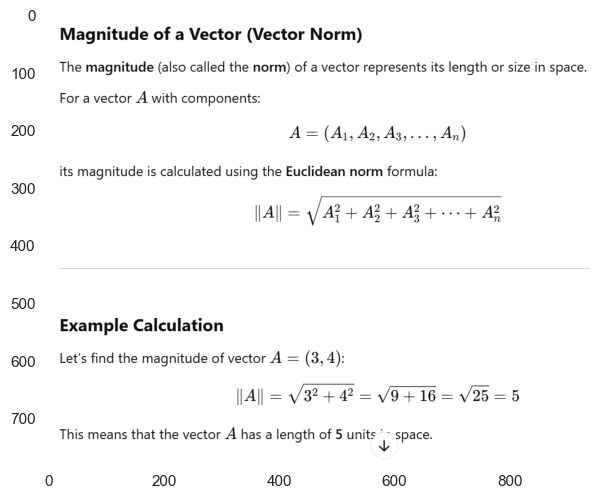

In [21]:
plt.figure(figsize= (7,7))
plt.imshow(imr(r"4.png"))
plt.grid()
plt.show();

#### Which Distance Metric Should You Choose?
* **Distance Metric** -------------------- **Best For** ------------------------ **When to Avoid** <br>
**Euclidean**	- `Low-dimensional continuous data` -	`High-dimensional data (curse of dimensionality)` <br>
**Manhattan**	- `Grid-like, independent features` -	`When diagonal movement matters` <br>
**Minkowski**	- `When tuning between Euclidean and Manhattan` -	`If r choice is unclear` <br>
**Cosine Similarity**	- `Text & sparse data` - `Dense numerical data`


* **Distance Metric :	Non-Negativity  -	Identity  -	 Symmetry -	Triangle Inequality** <br>
**Euclidean**   	✅ Yes	✅ Yes	✅ Yes	✅ Yes <br>
**Manhattan**	✅ Yes	✅ Yes	✅ Yes	✅ Yes <br>
**Minkowski**	✅ Yes	✅ Yes	✅ Yes	✅ Yes <br>
**Cosine**	❌ No (Cosine similarity is between -1 and 1, not a strict distance)	❌ No (Two different points can have zero cosine distance if collinear)	✅ Yes	❌ No (Triangle inequality fails)

#### 5. Gower’s Distance (For Mixed Data)
`Why?` <br>
`When a dataset has both categorical and numerical features, traditional distance metrics struggle because:`
> `Euclidean/Manhattan work well for numerical data.` <br>
`Hamming works well for categorical data.` <br>
`But how do we mix them? Gower’s Distance solves this!`

**How it Works:** <br>
* `It calculates feature-wise similarities and scales them between 0 and 1.` <br>
* `Numerical features → Normalized using Manhattan Distance.` <br>
* `Categorical features → Uses Hamming Distance (0 if same, 1 if different).` <br>
* `Final Distance = Weighted Sum of all feature distances.`

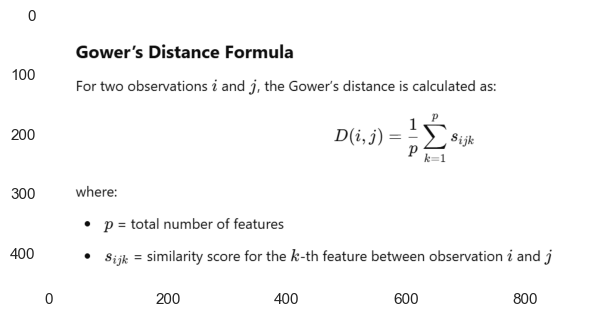

In [22]:
plt.figure(figsize= (7,7))
plt.imshow(imr(r"../Images/gd1.png"))
plt.grid()
plt.show();

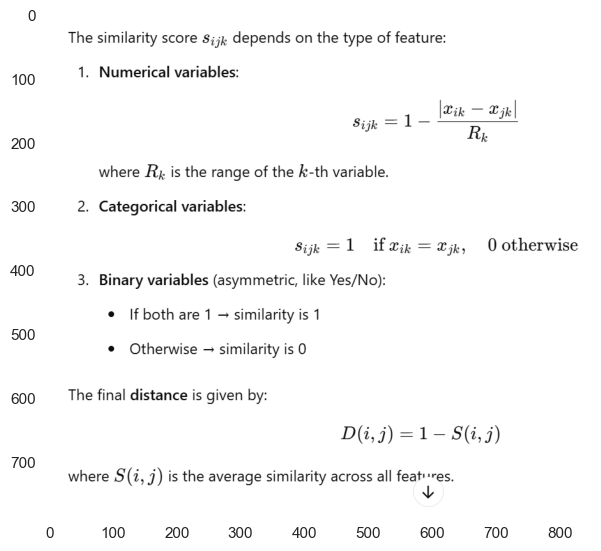

In [23]:
plt.figure(figsize= (7,7))
plt.imshow(imr(r"../Images/gd2.png"))
plt.grid()
plt.show();

* `where dk(i,j) is the distance for the k-th feature, scaled appropriately.`

#### When to Use Gower’s Distance?
`When you have both numerical and categorical features.` <br>
`In clustering algorithms (e.g., K-Means, Hierarchical Clustering).` <br>
`In distance-based machine learning models (e.g., KNN).`

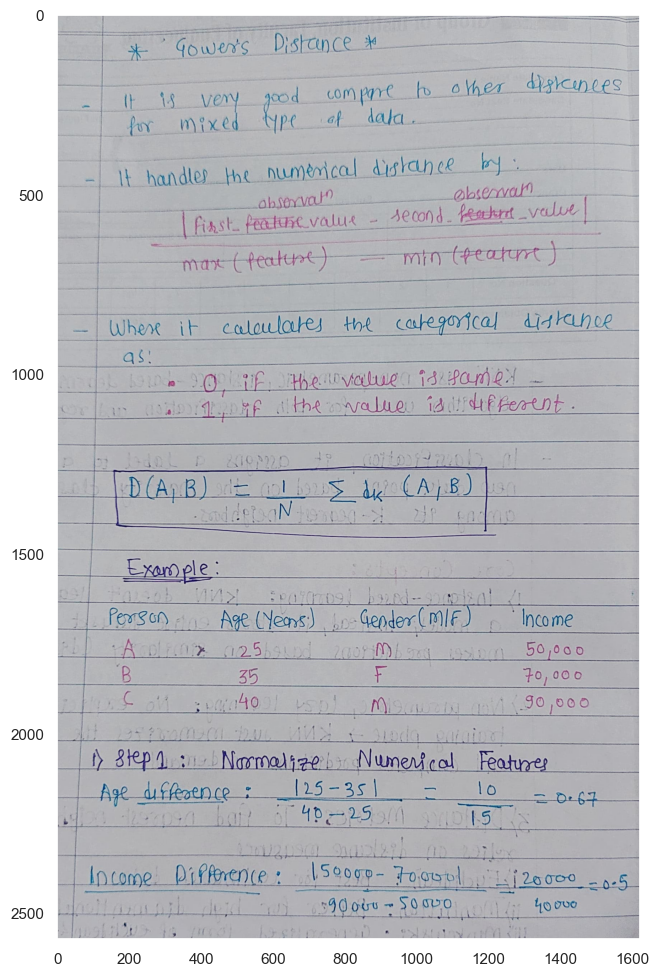

In [24]:
plt.figure(figsize= (8,12))
plt.imshow(imr(r"../Images/gowers.jpeg"))
plt.grid()
plt.show();

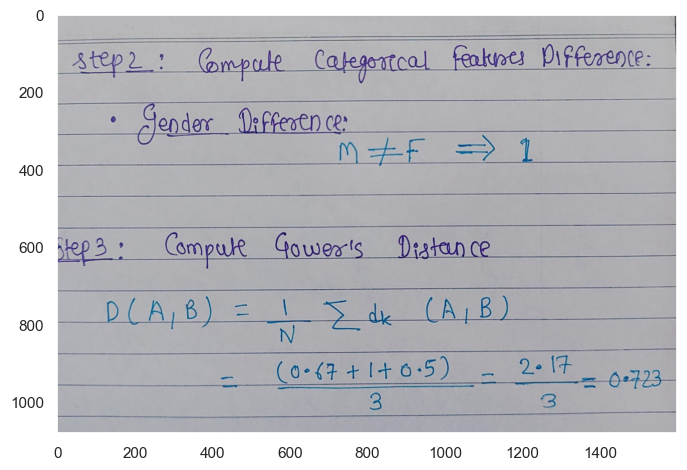

In [25]:
plt.figure(figsize= (8,12))
plt.imshow(imr(r"../Images/gowers1.jpeg"))
plt.grid()
plt.show();

#### 6. Hamming Distance (For Categorical Data)
`Why?` <br>
`When features are purely categorical (like Yes/No, Male/Female, Dog/Cat), Euclidean distance makes no sense. Instead, we use Hamming Distance, which counts the number of mismatches.`

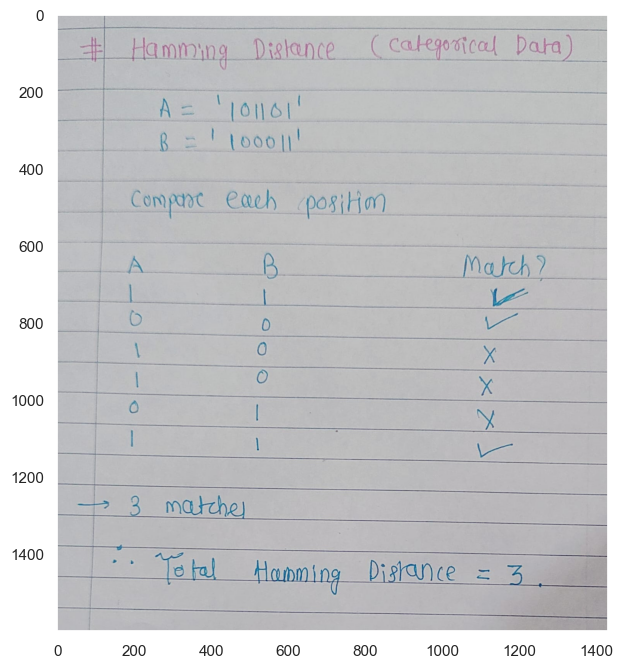

In [26]:
plt.figure(figsize= (8,8))
plt.imshow(imr(r"../Images/hamming.jpeg"))
plt.grid()
plt.show();

#### `It counts those as a distance which are mismatch.`

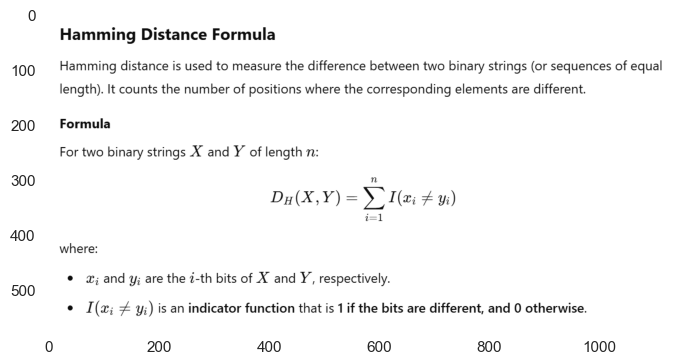

In [27]:
plt.figure(figsize= (8,8))
plt.imshow(imr(r"../Images/hd1.png"))
plt.grid()
plt.show();

`Compares two categorical strings or binary vectors.`

**Example:** <br>
> `A = "cat", B = "bat" → Hamming Distance = 1 (only 1 letter differs).` <br>
> `A = [1, 0, 1, 1], B = [1, 1, 0, 1] → Hamming Distance = 2 (two mismatches).`


#### Applications of Hamming Distance
* `DNA sequence comparison in bioinformatics.` <br>
* `Machine learning for text similarity and binary feature comparison.`

* **When to Use Each?** <br>
**Data Type ----------------------------------- Best Distance Metric**  <br>
**Only Numerical** --------------------- `Euclidean, Manhattan, Minkowski` <br>
**Only Categorical** -------------------- `Hamming Distance` <br>
**Mixed (Numerical + Categorical)** - `Gower’s Distance`

**Distance Metric----------------------------Used For----------------------------------------------Formula--------------------------------------------Example** <br>
**Gower’s Distance**    ---     `Mixed Data (Numerical + Categorical)`    --------     `Avg. of feature-wise distances`    --------     `Age, Gender, Income comparison` <br>
**Hamming Distance**    -    `Categorical/Binary Data`     --------------------------      `Count of mismatches`    -----------------------     `"101101" vs "100011" → 3 mismatches`

### How to Choose K in KNN?
`K (the number of neighbors) is the only hyperparameter in KNN, and choosing it correctly is critical.`

#### 1️⃣ What Happens When K is Too Small? (High Variance)
`The model closely follows the training data, meaning it is highly sensitive to noise.` <br>
`Leads to overfitting: the model memorizes noise instead of generalizing well.` <br>
`Decision boundaries become very complex and jagged.`
> **Example:**
>> `If K = 1, the prediction is based on just one neighbor. If that neighbor is an outlier, we make a completely wrong classification.`

#### 2️⃣ What Happens When K is Too Large? (High Bias)
`The model becomes too smooth and doesn’t capture finer details.` <br>
`Leads to underfitting: the model is too rigid and doesn’t adapt well to the data.` <br>
`Decision boundaries become overly simple and can misclassify important details.`
> **Example:**
>> `If K = total dataset size, every new point is classified as the majority class, which makes KNN useless!`

#### 3️⃣ The Bias-Variance Tradeoff in KNN
`K is directly related to the bias-variance tradeoff:`

* **Low K** → Low bias, high variance (too sensitive to individual points).
* **High K** → High bias, low variance (too generalized).

##### Ideal Choice of K?

`Often, odd values of K (like 3, 5, 7) are chosen to avoid ties.` <br>
`K ≈ sqrt(N) (where N is the dataset size) is a rough rule of thumb.` <br>
`The best K is found using cross-validation (testing different K values and choosing the one with the best accuracy).`

* **K Value - Bias - Variance - Problem** <br>
**Low K (e.g., K=1, 3)** - 	`Low` - `High` - `Overfitting` <br>
**High K (e.g., K=50, 100)** - 	`High` - `Low` - `Underfitting` <br>
**Optimal K** - `Balanced` - `Balanced` - `Best Generalization`

### IMPACT OF K ON DECISION BOUNDARY 

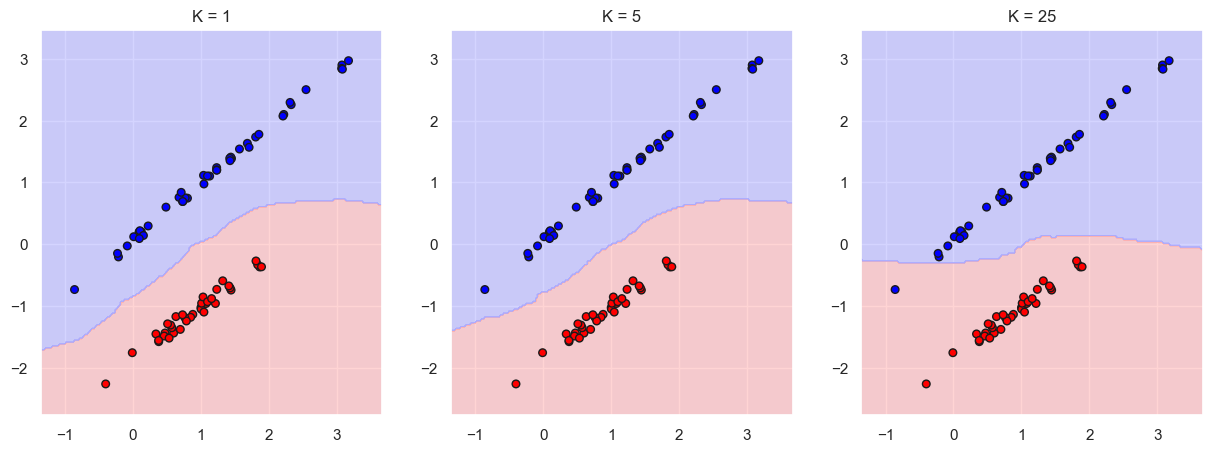

In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# Regenerate synthetic dataset with correct parameters
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different values of K to visualize
k_values = [1, 5, 25]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
cmap_background = ListedColormap(["#FFAAAA", "#AAAAFF"])  # Light red & light blue
cmap_points = ListedColormap(["#FF0000", "#0000FF"])  # Red & blue

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Predict class for each point in mesh grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot decision boundary
    axes[i].contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolors='k', s=30)
    axes[i].set_title(f"K = {k}")

plt.show()

### Mathematical Properties of Distance Metrics
`A good distance metric must satisfy four key axioms (properties). These define what makes a function a valid "distance measure" in a mathematical sense.`

#### 1️⃣ Non-Negativity (Distance is Always ≥ 0)
**d(A,B)≥0** <br>
`Distance can never be negative.` <br>
`The minimum distance (0) happens only when A=B (i.e., same point).`
#### 2️⃣ Identity of Indiscernibles (Jinhe alag nhi maan sakte like ek hi place ke do naam hona, toh unka distance bhi zero hi hona as we are referring to one and only same thing.  Zero Distance Means Same Points)
**d(A,B)=0 if and only if A=B** <br>
`If two points have zero distance, they must be identical.` <br>
`This prevents the metric from treating two different points as the same.`
#### 3️⃣ Symmetry (Distance Works Both Ways)
**d(A,B)=d(B,A)** <br>
`Distance should not depend on the order of points.` <br>
`If traveling from A to B is 5 units, then from B to A must also be 5 units.`
#### 4️⃣ Triangle Inequality (The Shortcut Rule)
**d(A,C) ≤ d(A,B) + d(B,C)** <br>
`The shortest distance between two points is always a direct path.` <br>
`Taking a "detour" through a third point should never be shorter than a direct connection.`
> **💡 Example of Triangle Inequality in Real Life:**
>> `If you want to go from home (A) to work (C), taking a detour through a friend’s house (B) should not be faster than going directly.`

### KNN from scratch for classification problem

In [29]:
from collections import Counter

class KNNClassifier:
    def __init__(self, k=3):
        """Initialize KNN with a specified number of neighbors."""
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """Store the training data."""
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    
    def _compute_distances(self, x):
        """Compute Euclidean distances from x to all training points."""
        return np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
    
    def _get_k_neighbors(self, distances):
        """Find the indices of the K nearest neighbors."""
        return np.argsort(distances)[:self.k]
    
    def _majority_vote(self, neighbor_indices):
        """Return the most common class label among neighbors."""
        neighbor_labels = self.y_train[neighbor_indices]
        return Counter(neighbor_labels).most_common(1)[0][0]
    
    def predict(self, X):
        """Predict classes for multiple samples."""
        X = np.array(X)
        predictions = []
        for x in X:
            distances = self._compute_distances(x)
            neighbor_indices = self._get_k_neighbors(distances)
            predictions.append(self._majority_vote(neighbor_indices))
        return np.array(predictions)



# Define toy dataset
X_train = np.array([
    [1, 2], [2, 3], [3, 3],  # Class 0
    [6, 5], [7, 7], [8, 6]   # Class 1
])
y_train = np.array([0, 0, 0, 1, 1, 1])  # Labels

# Define test points
X_test = np.array([
    [2, 2],  # Should be Class 0
    [7, 6]   # Should be Class 1
])

# Initialize and train KNN model
knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)

# Predict test points
y_pred = knn.predict(X_test)
y_pred

array([0, 1])

In [30]:
a = np.array([
    [71,42,91,3,5]])

np.argsort(a)

array([[3, 4, 1, 0, 2]])

### Code from scratch in python using numpy with dummy data

In [11]:
# dummy data

X = np.array([[1,2], [3,4], [5,6], [7,8], [9,10]])
y = np.array([0,0,1,1,1])

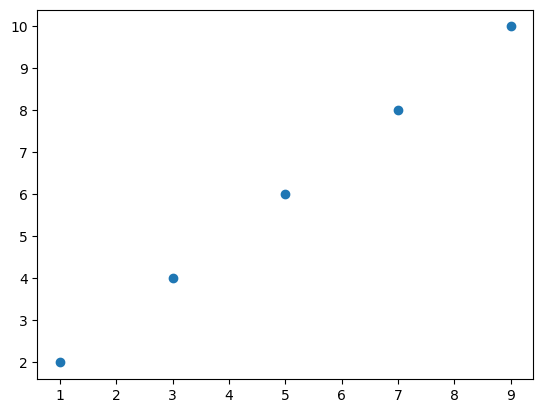

In [12]:
#

plt.scatter(X.T[0], X.T[1])

In [33]:
# store training data

def store_tr_data(X,y):
    tr_data_x = X
    tr_data_y = y
    return tr_data_x, tr_data_y

In [34]:
# calculate distance
# Only for binary classification

def pred(input_data, k):
    distance = np.sqrt(np.sum((input_data - X)**2, axis= 1))
    
    dis = {}
    t = 0
    for i in distance:
        dis[i] = t
        t = t+1
        
    tem_dis = sorted(dis.items(), key= lambda x: x[0])[:k]

    temp = []
    for i in range(len(tem_dis)):
        temp.append(y[tem_dis[i][1]])
        
    if sum(temp) > len(temp)/2:
        return 1
    else:
        return 0

In [35]:
# calculate distance

from collections import Counter

def pred_all(input_data, k):
    distance = np.sqrt(np.sum((input_data - X)**2, axis= 1))
    # print(distance)
    
    dis = {}
    ind = 0
    for i in distance:
        dis[i] = ind
        ind = ind+1
    # print(dis)
        
    tem_dis = sorted(dis.items(), key= lambda x: x[0])[:k]
    # print(tem_dis)
    
    temp = []
    for i in range(k):
        temp.append(y[tem_dis[i][1]])
    # print(temp)
    
    mode = dict(Counter(temp))
    
    return sorted(mode.items(), key= lambda x: x[1], reverse= True)[0][0]

In [36]:
# calculate distance another way

from collections import Counter

def pred_all(input_data, k):
    distance = np.sqrt(np.sum((input_data - X)**2, axis= 1))

    dis = {}
    ind = 0
    for i in distance:
        dis[i] = y[ind]
        ind += 1
        
    tem_dis = dict(sorted(dis.items(), key= lambda x: x[0])[:k]).values()
    mode = dict(Counter(tem_dis))
    
    return list(mode.items())[0][0]

In [37]:
pred_all(np.array([3.5,7.2]), 3)

np.int64(1)

In [38]:
pred_all(np.array([9,10]), 3)

np.int64(1)

In [39]:
pred_all(np.array([1.1,2]), 3)

np.int64(0)

In [40]:
pred_all(np.array([-1.5,1.5]), 3)

np.int64(0)

In [41]:
X.T[1], X.T[0]

(array([ 2,  4,  6,  8, 10]), array([1, 3, 5, 7, 9]))

In [42]:
#

def plot(X, input_data):
    plt.scatter(X.T[0], X.T[1])
    plt.scatter(input_data[0], input_data[1])
    plt.show();

In [43]:
pred_all(np.array([-1.5,1.5]), 3)

np.int64(0)

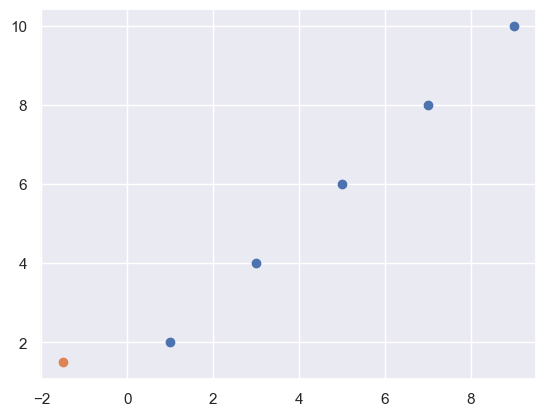

In [44]:
plot(X,np.array([-1.5,1.5]))

In [45]:
s = pred(np.array([3.5,7.2]), 3)
s

1

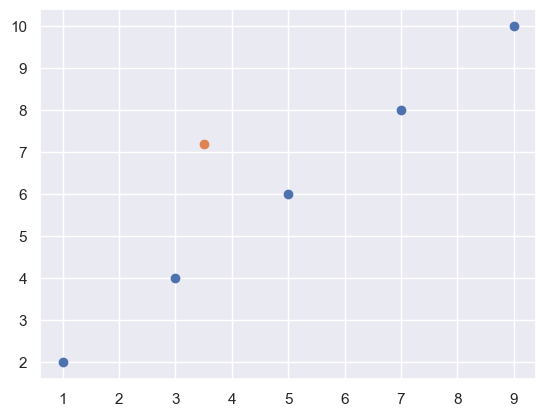

In [46]:
plot(X,np.array([3.5,7.2]))

In [47]:
s1 = pred(np.array([9,10]), 3)
s1

1

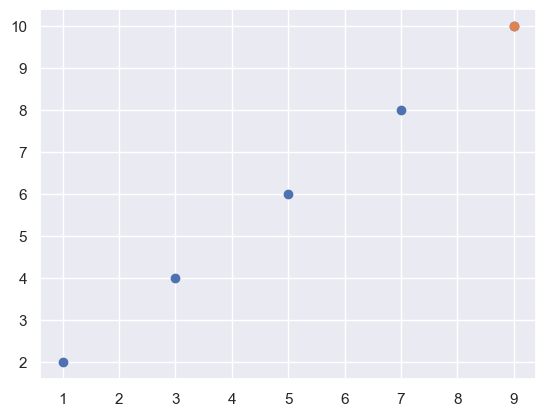

In [48]:
plot(X,np.array([9,10]))

In [49]:
s2 = pred(np.array([5,3.5]), 3)
s2

0

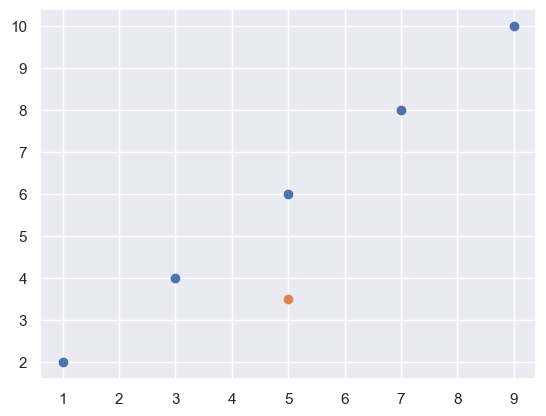

In [50]:
plot(X,np.array([5,3.5]))

In [51]:
s2 = pred(np.array([1.1,2]), 3)
s2

0

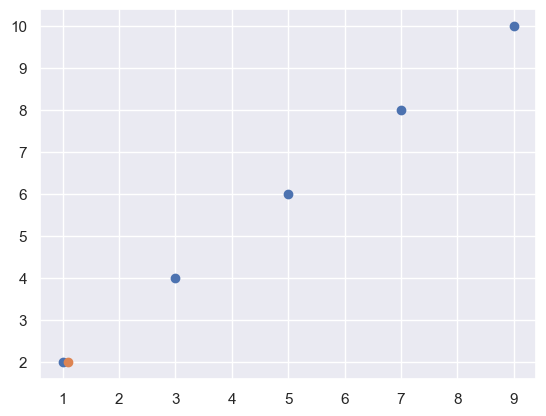

In [52]:
plot(X,np.array([1.1,2]))

### Using sklearn

### Parameters of KNeighborsclassifer

**1. 🔢 n_neighbors**  <br>
What it means: <br>
How many neighbors should vote? <br>
Default: 5

Example: <br>
If n_neighbors=3, the model looks at the 3 closest points and picks the most common label.

🧠 Think of it as: "How many friends should I ask before making a decision?"

**2. ⚖️ weights** <br>
What it means:
Should all neighbors count equally, or should closer ones matter more?

'uniform' → All neighbors have equal vote ✅ (default)

'distance' → Closer neighbors get more weight (like more important opinions)

Example:
If point A is closer than point B, and you use 'distance', A will affect the prediction more.

**3. 🧭 algorithm** <br>
What it means:
How should it search for the nearest neighbors?

Options:

'auto' → Picks best one for you (based on data)

'ball_tree' → Good for medium-sized data

'kd_tree' → Good for low-dimensional numeric data

'brute' → Checks every single point (slow but safe)

Most of the time, just leave it as 'auto'.

**4. 🍃 leaf_size** <br>
What it means:
It’s a tuning knob for speed vs memory (used with kd_tree or ball_tree).

Smaller value = Faster to build the tree, Slower to search

Larger value = Slower to build, Faster to search

Default: 30
➡ You don’t usually need to touch this unless optimizing for large data.

**5. 🧮 p** <br>
What it means:
This controls the type of distance:

p=1 → Manhattan distance 🏙️ (good for categorical/one-hot)

p=2 → Euclidean distance 📏 (default)

You only use this if metric='minkowski' (which it is, by default).

**6. 🧑‍🏫 metric** <br>
What it means:
Which distance formula to use?

**Common options:**
* **'minkowski'** → A general formula (lets you choose p=1 or p=2) <br>
* **'euclidean'** → Same as minkowski with p=2 <br>
* **'manhattan'** → Same as minkowski with p=1 <br>
* **'cosine', 'hamming'** → You can also use these for special cases

In [53]:
#

knn = KNeighborsClassifier(n_neighbors= 3)
knn

KNeighborsClassifier(n_neighbors=3)

In [54]:
#

knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [55]:
#

knn.predict(np.array([[3.5,7.2]]))

array([1])

In [56]:
#

knn.predict(np.array([[9,10]]))

array([1])

In [57]:
#

knn.predict(np.array([[1.1,10]]))

array([1])

In [58]:
#

knn.predict(np.array([[1.1,1.2]]))

array([0])

In [59]:
# read data

data = pd.read_csv('..\data\mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,

In [60]:
# data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [61]:
# null values

[i for i in (data.isnull().sum() > 0) if i == True]

[]

In [62]:
# constant features

constant_features = [i for i in data.columns if data[i].nunique() == 1]
constant_features

['1x1',
 '1x2',
 '1x3',
 '1x4',
 '1x5',
 '1x6',
 '1x7',
 '1x8',
 '1x9',
 '1x10',
 '1x11',
 '1x12',
 '1x17',
 '1x18',
 '1x19',
 '1x20',
 '1x21',
 '1x22',
 '1x23',
 '1x24',
 '1x25',
 '1x26',
 '1x27',
 '1x28',
 '2x1',
 '2x2',
 '2x3',
 '2x4',
 '2x25',
 '2x26',
 '2x27',
 '2x28',
 '3x1',
 '3x2',
 '3x27',
 '3x28',
 '4x1',
 '4x2',
 '4x28',
 '5x1',
 '6x1',
 '6x2',
 '7x1',
 '18x1',
 '21x1',
 '24x1',
 '24x2',
 '24x28',
 '25x1',
 '25x2',
 '25x28',
 '26x1',
 '26x2',
 '26x28',
 '27x1',
 '27x2',
 '27x3',
 '27x27',
 '27x28',
 '28x1',
 '28x2',
 '28x3',
 '28x4',
 '28x25',
 '28x26',
 '28x27',
 '28x28']

In [63]:
# Drop constant Features

data.drop(constant_features, axis= 1, inplace= True)

Text(0, 0.5, 'Count')

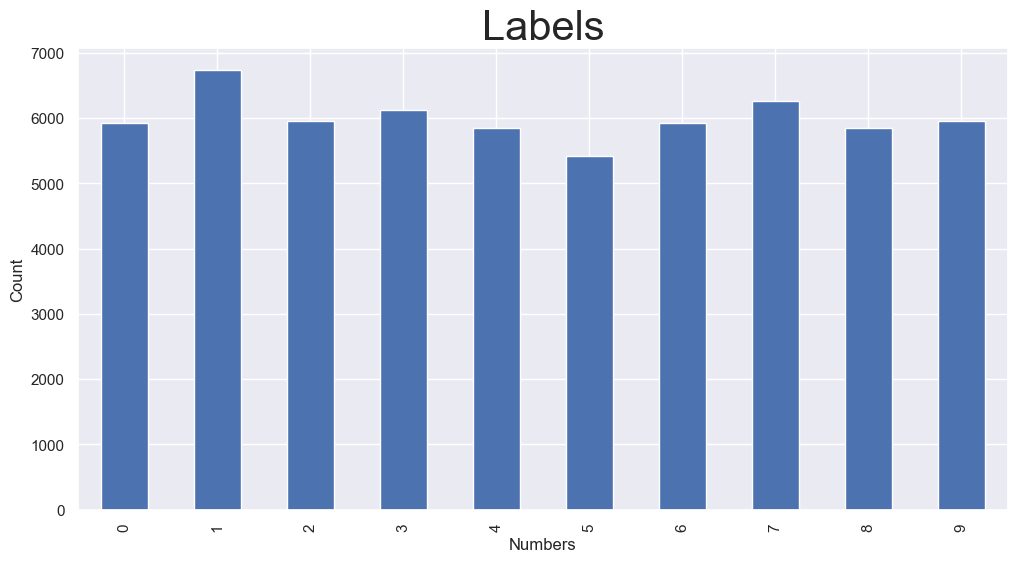

In [64]:
# label(Target) value counts

plt.figure(figsize= (12,6))
data['label'].value_counts().sort_index().plot(kind= 'bar')
plt.title('Labels', fontsize= 30)
plt.xlabel('Numbers')
plt.ylabel('Count')

In [65]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(data.drop('label', axis= 1),
                                                   data['label'],
                                                   test_size= 0.2,
                                                   random_state= 0)

X_train.shape, X_test.shape

((48000, 717), (12000, 717))

In [66]:
# target value counts

y_train.value_counts()

label
1    5363
7    5037
3    4923
2    4792
9    4744
6    4728
0    4718
4    4689
8    4660
5    4346
Name: count, dtype: int64

In [67]:
# create an instance for standardscaler

scale = StandardScaler()
scale

StandardScaler()

In [68]:
# learn the values

scale.fit(X_train)

StandardScaler()

In [69]:
# impute the learnt values

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [70]:
# create an instance for the model

model = KNeighborsClassifier(n_neighbors= 5, weights= 'uniform', n_jobs= -1)
model

KNeighborsClassifier(n_jobs=-1)

In [71]:
# fit the model/ learn the values

model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [75]:
# predict for train data

train_pred = model.predict(X_train)
train_pred

array([7, 4, 5, ..., 7, 1, 4], shape=(48000,))

In [76]:
# create a dataframe for the original and the predicted values

training = pd.DataFrame({'original': y_train, 'prediction': train_pred})
training

,original,prediction
5778,7,7
5287,4,4
57167,5,5
29516,7,7
58610,1,1
...,...,...
45891,8,8
52416,1,1
42613,7,7
43567,1,1


In [77]:
# calculate and create a new feature for the result

training['result'] = np.where(training['original'] == training['prediction'], 1, 0)
training

,original,prediction,result
5778,7,7,1
5287,4,4,1
57167,5,5,1
29516,7,7,1
58610,1,1,1
...,...,...,...
45891,8,8,1
52416,1,1,1
42613,7,7,1
43567,1,1,1


In [78]:
# Accuracy

training['result'].mean()

np.float64(0.9625416666666666)

In [79]:
# recall

recall_score(training['original'],training['prediction'], average= 'macro')

0.9620212364521116

In [80]:
# recall

recall_score(training['original'],training['prediction'], average= 'micro')

0.9625416666666666

In [81]:
# recall

recall_score(training['original'],training['prediction'], average= 'weighted')

0.9625416666666666

In [82]:
# precision

precision_score(training['original'],training['prediction'], average= 'macro')

0.962759146275608

In [83]:
# precision

precision_score(training['original'],training['prediction'], average= 'micro')

0.9625416666666666

In [84]:
# precision

precision_score(training['original'],training['prediction'], average= 'weighted')

0.9627095180412554

In [85]:
# f1 score

f1_score(training['original'],training['prediction'], average= 'macro')

0.962230472350381

In [86]:
# f1 score

f1_score(training['original'],training['prediction'], average= 'micro')

0.9625416666666666

In [87]:
# f1 score

f1_score(training['original'],training['prediction'], average= 'weighted')

0.9624666249892374

### Validation

In [88]:
# predict for the test data

test_pred = model.predict(X_test)
test_pred

array([3, 6, 6, ..., 5, 1, 6], shape=(12000,))

In [89]:
# create a dataframe for the original and the predicted values

testing = pd.DataFrame({'original': y_test, 'prediction': test_pred})
testing

,original,prediction
3048,3,3
19563,6,6
58303,6,6
8870,6,6
40228,0,0
...,...,...
47049,7,7
31629,6,6
50430,5,5
21574,1,1


In [90]:
# calculate and create a new feature for the result

testing['result'] = np.where(testing['original'] == testing['prediction'], 1, 0)
testing

,original,prediction,result
3048,3,3,1
19563,6,6,1
58303,6,6,1
8870,6,6,1
40228,0,0,1
...,...,...,...
47049,7,7,1
31629,6,6,1
50430,5,5,1
21574,1,1,1


In [91]:
# Accuracy percentage

testing['result'].mean()

np.float64(0.9465833333333333)

In [92]:
# recall

recall_score(testing['original'],testing['prediction'], average= 'macro')

0.9454603998824165

In [93]:
# recall

recall_score(testing['original'],testing['prediction'], average= 'micro')

0.9465833333333333

In [94]:
# recall

recall_score(testing['original'],testing['prediction'], average= 'weighted')

0.9465833333333333

In [95]:
# precision

precision_score(testing['original'],testing['prediction'], average= 'macro')

0.946557574320748

In [96]:
# precision

precision_score(testing['original'],testing['prediction'], average= 'micro')

0.9465833333333333

In [97]:
# precision

precision_score(testing['original'],testing['prediction'], average= 'weighted')

0.9468109877390956

In [98]:
# f1 score

f1_score(testing['original'],testing['prediction'], average= 'macro')

0.9457295843999074

In [99]:
# f1 score

f1_score(testing['original'],testing['prediction'], average= 'micro')

0.9465833333333333

In [100]:
# f1 score

f1_score(testing['original'],testing['prediction'], average= 'weighted')

0.9464137946244146

### Testing

In [101]:
# read data

test = pd.read_csv('..\data\mnist_test.csv')
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,

In [102]:
# Drop constant Features

test.drop(constant_features, axis= 1, inplace= True)

In [103]:
# scale the data

test_scale = scale.transform(test.drop('label', axis= 1))

In [104]:
# prediction for the test scale

test_pred = model.predict(test_scale)
test_pred

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [105]:
# create a dataframe for the original and the predicted values

testing_prediction = pd.DataFrame({'original': test['label'], 'prediction': test_pred})
testing_prediction

,original,prediction
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [106]:
# calculate and create a new feature for the result

testing_prediction['result'] = np.where(testing_prediction['original'] == testing_prediction['prediction'], 1, 0)
testing_prediction

,original,prediction,result
0,7,7,1
1,2,2,1
2,1,1,1
3,0,0,1
4,4,4,1
...,...,...,...
9995,2,2,1
9996,3,3,1
9997,4,4,1
9998,5,5,1


In [107]:
# Accuracy

testing_prediction['result'].mean()

np.float64(0.9421)

In [108]:
# recall

recall_score(testing_prediction['original'],testing_prediction['prediction'], average= 'macro')

0.9413256355157584

In [109]:
# recall

recall_score(testing_prediction['original'],testing_prediction['prediction'], average= 'micro')

0.9421

In [110]:
# recall

recall_score(testing_prediction['original'],testing_prediction['prediction'], average= 'weighted')

0.9421

In [111]:
# precision

precision_score(testing_prediction['original'],testing_prediction['prediction'], average= 'macro')

0.9421903806684041

In [112]:
# precision

precision_score(testing_prediction['original'],testing_prediction['prediction'], average= 'micro')

0.9421

In [113]:
# precision

precision_score(testing_prediction['original'],testing_prediction['prediction'], average= 'weighted')

0.9423050492979591

In [114]:
# f1 score

f1_score(testing_prediction['original'],testing_prediction['prediction'], average= 'macro')

0.9414747841554026

In [115]:
# f1 score

f1_score(testing_prediction['original'],testing_prediction['prediction'], average= 'micro')

0.9421

In [116]:
# f1 score

f1_score(testing_prediction['original'],testing_prediction['prediction'], average= 'weighted')

0.9419152475214476

In [117]:
# function to find the accuracy for each label

def labels_accuracy(df1):
    df = dict()
    for label in range(0,10):
        df[label] = df1[df1['original'] == label]['result'].mean()
        
    return pd.DataFrame(df, index= ['result']).T

In [118]:
# call the function to know the accuracy

labels_accuracy(testing_prediction)

,result
0,0.983673
1,0.994714
2,0.928295
3,0.952475
4,0.928717
5,0.920404
6,0.970772
7,0.920233
8,0.894251
9,0.919722


### Code from scratch for classification and regression by creating a class

In [119]:
from collections import Counter

class KNNClassifier:
    def __init__(self, k=3):
        """Initialize KNN with a specified number of neighbors."""
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """Store the training data."""
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    
    def _compute_distances(self, x):
        """Compute Euclidean distances from x to all training points."""
        return np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
    
    def _get_k_neighbors(self, distances):
        """Find the indices of the K nearest neighbors."""
        return np.argsort(distances)[:self.k]
    
    def _majority_vote(self, neighbor_indices):
        """Return the most common class label among neighbors."""
        neighbor_labels = self.y_train[neighbor_indices]
        return Counter(neighbor_labels).most_common(1)[0][0]
    
    def predict(self, X):
        """Predict classes for multiple samples."""
        X = np.array(X)
        predictions = []
        for x in X:
            distances = self._compute_distances(x)
            neighbor_indices = self._get_k_neighbors(distances)
            predictions.append(self._majority_vote(neighbor_indices))
        return np.array(predictions)

In [120]:
# Initialize and train KNN model
knn = KNNClassifier(k=3)

In [121]:
knn.fit(X_train, y_train)

In [122]:
# Predict test points
y_pred = knn.predict(X_test[:5])
y_pred

array([3, 6, 6, 6, 0])

In [123]:
# for single prediction

class knn:
    '''
    This class contain method for initilization, regression problem, classification problem and prediction
    '''
    def __init__(self, k= 3):
        '''
        For initilizing
        '''
        self.k = k
        self.X_train = None
        self.y_train = None
        self.problem = input('Press 0 or C for classification problem and 1 or R for regression problem - ')
        self.distance = input('Press 0 for Eculidean distance and 1 for Manhantan distance - ')
        self.test_data = None

    def fit(self, X, y):
        '''
        Function to store the data
        '''
        # Store training Data
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def scaling(self):
        '''
        It will scale the data
        '''
        scl = StandardScaler()
        self.X_train = scl.fit_transform(self.X_train)
        self.test_data = scl.transform(self.test_data)

    def euclidean_distance(self):
        """
        Compute the Euclidean distance between two N-dimensional points.
       
        :param point1: List or array representing first point (e.g., [x1, y1, z1, ...])
        :param point2: List or array representing second point (e.g., [x2, y2, z2, ...])
        :return: Euclidean distance between point1 and point2
        """
        point1, point2 = np.array(self.X_train), np.array(self.test_data)  # Ensure inputs are NumPy arrays
        return np.sqrt(np.sum((point1 - point2) ** 2, axis= 1))  # Apply Euclidean formula

    def manhantan_distance(self):
        """
        Compute the Manhantan distance between two N-dimensional points.
       
        :param point1: List or array representing first point (e.g., [x1, y1, z1, ...])
        :param point2: List or array representing second point (e.g., [x2, y2, z2, ...])
        :return: Manhantan distance between point1 and point2
        """
        point1, point2 = np.array(self.X_train), np.array(self.test_data)  # Ensure inputs are NumPy arrays
        return np.sum(np.abs(point1 - point2), axis= 1)  # Apply manhanton formula

    def classificationknn(self):
        '''
        Calculation for classification
        '''
        if self.distance == '0': # Eculidean
            dis = self.euclidean_distance()
        elif self.distance == '1': # Manhantan
            dis = self.manhantan_distance()
        else:
            return 'Wrong Input!!'

        k_dis = self.y_train[np.argsort(dis)][:self.k]
        return list(Counter(k_dis).items())[-1][0]

    def regressionknn(self):
        '''
        Calculation for regression
        '''
        if self.distance == '0': # Eculidean
            dis = self.euclidean_distance()
        elif self.distance== '1': # Manhantan
            dis = self.manhantan_distance()
        else:
            return 'Wrong Input!'
        
        k_dis = self.y_train[np.argsort(dis)][:self.k]
        return sum(Counter(k_dis).keys())/self.k

    def prediction(self, test_data):
        '''
        Will do calculations for prediction on the basis of user input
        '''
        self.test_data = np.array(test_data)
        self.scaling()
        
        if self.problem.lower() in ['c', '0']: # Classification
            return self.classificationknn()
        elif self.problem.lower() in ['r', '1']: # Regression
            return self.regressionknn()               
        else:
            return 'Wrong Input!!'

In [124]:
X_train = pd.DataFrame({'x1': [2,3,4,7,9], 'x2': [21,23,22,12,35], 'x3': [900,950,500,250,350]})
# y_train = pd.Series([23,44,12,34,5])
y_train = pd.Series(['A', 'B', 'B', 'A', 'A'])
X_test = pd.DataFrame({'x1': [12,2,2], 'x2': [21,11,21], 'x3': [700,200,900]})

In [125]:
k = knn()

Press 0 or C for classification problem and 1 or R for regression problem -  c
Press 0 for Eculidean distance and 1 for Manhantan distance -  1


In [126]:
k.fit(X_train, y_train)

In [127]:
for i in range(len(X_test)):
    print(k.prediction(np.array(X_test.iloc[i,:],ndmin= 2)))

A
B
B


In [128]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(data.drop('label', axis= 1),
                                                   data['label'],
                                                   test_size= 0.0005,
                                                   random_state= 0)

X_train.shape, X_test.shape

((59970, 717), (30, 717))

In [129]:
k1 = knn()

Press 0 or C for classification problem and 1 or R for regression problem -  r
Press 0 for Eculidean distance and 1 for Manhantan distance -  0


In [130]:
k1.fit(X_train, y_train)

In [131]:
for i in range(len(X_test)):
    print(k1.prediction(np.array(X_test.iloc[i,:],ndmin= 2)))

1.0
2.0
2.0
2.0
0.0
3.3333333333333335
2.0
0.6666666666666666
1.6666666666666667
2.0
1.6666666666666667
2.6666666666666665
0.0
0.0
0.0
0.3333333333333333
0.6666666666666666
0.6666666666666666
3.0
3.6666666666666665
2.0
3.0
2.6666666666666665
5.333333333333333
0.0
0.0
3.6666666666666665
2.3333333333333335
0.0
2.0


In [132]:
k1 = knn()

Press 0 or C for classification problem and 1 or R for regression problem -  c
Press 0 for Eculidean distance and 1 for Manhantan distance -  1


In [133]:
k1.fit(X_train, y_train)

In [135]:
# for multiple prediction

class knn:
    '''
    This class contain method for initilization, regression problem, classification problem and prediction
    '''
    def __init__(self, k= 3):
        '''
        For initilizing
        '''
        self.k = k
        self.X_train = None
        self.y_train = None
        self.problem = input('Press 0 or C for classification problem and 1 or R for regression problem - ')
        self.distance = input('Press 0 for Eculidean distance and 1 for Manhantan distance - ')
        self.test_data = None

    def fit(self, X, y):
        '''
        Function to store the data
        '''
        # Store training Data
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def scaling(self):
        '''
        It will scale the data
        '''
        scl = StandardScaler()
        self.X_train = scl.fit_transform(self.X_train)
        self.test_data = scl.transform(self.test_data)

    def euclidean_distance(self, x):
        """
        Compute the Euclidean distance between two N-dimensional points.
       
        :param point1: List or array representing first point (e.g., [x1, y1, z1, ...])
        :param point2: List or array representing second point (e.g., [x2, y2, z2, ...])
        :return: Euclidean distance between point1 and point2
        """
        point1, point2 = np.array(self.X_train), np.array(x)  # Ensure inputs are NumPy arrays
        return np.sqrt(np.sum((point1 - point2) ** 2, axis= 1))  # Apply Euclidean formula

    def manhantan_distance(self, x):
        """
        Compute the Manhantan distance between two N-dimensional points.
       
        :param point1: List or array representing first point (e.g., [x1, y1, z1, ...])
        :param point2: List or array representing second point (e.g., [x2, y2, z2, ...])
        :return: Manhantan distance between point1 and point2
        """
        point1, point2 = np.array(self.X_train), np.array(x)  # Ensure inputs are NumPy arrays
        return np.sum(np.abs(point1 - point2), axis= 1)  # Apply manhanton formula

    def classificationknn(self):
        '''
        Calculation for classification
        '''
        if self.distance == '0': # Eculidean
            pred = []
            for i in range(len(self.test_data)):
                dis = self.euclidean_distance(np.array(self.test_data[i,:],ndmin= 2))
                k_dis = self.y_train[np.argsort(dis)][:self.k]
                pred.append(list(Counter(k_dis).items())[-1][0])
            return pred
        elif self.distance == '1': # Manhantan
            pred = []
            for i in range(len(self.test_data)):
                dis = self.manhantan_distance(np.array(self.test_data[i,:],ndmin= 2))
                k_dis = self.y_train[np.argsort(dis)][:self.k]
                pred.append(list(Counter(k_dis).items())[-1][0])
            return pred
        else:
            return 'Wrong Input!!'
        

    def regressionknn(self):
        '''
        Calculation for regression
        '''
        if self.distance == '0': # Eculidean
            pred = []
            for i in range(len(self.test_data)):
                dis = self.euclidean_distance(np.array(self.test_data[i,:],ndmin= 2))
                k_dis = self.y_train[np.argsort(dis)][:self.k]
                pred.append(sum(Counter(k_dis).keys())/self.k)
            return pred
        elif self.distance== '1': # Manhantan
            pred = []
            for i in x:
                dis = self.manhantan_distance(np.array(self.test_data[i,:],ndmin= 2))
                k_dis = self.y_train[np.argsort(dis)][:self.k]
                pred.append(sum(Counter(k_dis).keys())/self.k)
            return pred
        else:
            return 'Wrong Input!'
    

    def prediction(self, test_data):
        '''
        Will do calculations for prediction on the basis of user input
        '''
        self.test_data = np.array(test_data)
        self.scaling()
        
        if self.problem.lower() in ['c', '0']: # Classification
            return self.classificationknn()
        elif self.problem.lower() in ['r', '1']: # Regression
            return self.regressionknn()               
        else:
            return 'Wrong Input!!'

In [136]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(data.drop('label', axis= 1),
                                                   data['label'],
                                                   test_size= 0.0001,
                                                   random_state= 0)

X_train.shape, X_test.shape

((59994, 717), (6, 717))

In [140]:
k1 = knn()

Press 0 or C for classification problem and 1 or R for regression problem -  r
Press 0 for Eculidean distance and 1 for Manhantan distance -  0


In [141]:
k1.fit(X_train, y_train)

In [142]:
k1.prediction(X_test)

[np.float64(1.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(0.0),
 np.float64(1.0)]

### Impact of K in nearest neighbor algorithm

C:\ProgramData\anaconda3\envs\classical\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\envs\classical\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


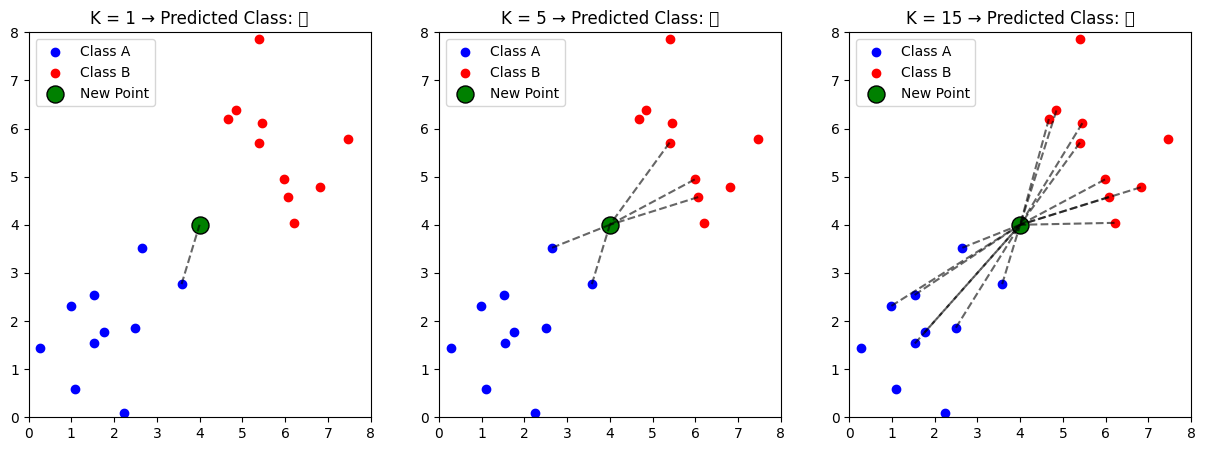

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate sample data
np.random.seed(42)
class_A = np.random.randn(10, 2) + [2, 2]  # Cluster around (2,2)
class_B = np.random.randn(10, 2) + [6, 6]  # Cluster around (6,6)
X = np.vstack((class_A, class_B))
y = np.array([0] * 10 + [1] * 10)  # 0 for Class A (blue), 1 for Class B (red)

# New point to classify
new_point = np.array([[4, 4]])

# Create a plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
k_values = [1, 5, 15]

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    pred = knn.predict(new_point)

    # Plot existing data points
    axes[i].scatter(class_A[:, 0], class_A[:, 1], color='blue', label="Class A")
    axes[i].scatter(class_B[:, 0], class_B[:, 1], color='red', label="Class B")
    
    # Plot the new point
    axes[i].scatter(new_point[0, 0], new_point[0, 1], color='green', s=150, edgecolors='black', label="New Point")

    # Find and plot the K nearest neighbors
    distances, indices = knn.kneighbors(new_point)
    
    for idx in indices[0]:
        axes[i].plot([X[idx, 0], new_point[0, 0]], [X[idx, 1], new_point[0, 1]], 'k--', alpha=0.6)

    # Set title and labels
    axes[i].set_title(f"K = {k} → Predicted Class: {'🔵' if pred == 0 else '🔴'}")
    axes[i].legend(loc= 'upper left')
    axes[i].set_xlim(0, 8)
    axes[i].set_ylim(0, 8)

plt.show();

#### 1️⃣ K = 1 (Overfitting, High Variance)

`Decision boundary is very jagged and closely follows training points.` <br>
`Model is too sensitive to individual points (including noise).`


#### 2️⃣ K = 5 (Balanced, Good Tradeoff)

`Decision boundary is smoother but still adapts well to data.` <br>
`Less noise-sensitive while still capturing patterns.`


#### 3️⃣ K = 15 (Underfitting, High Bias)

`Decision boundary is overly smoothed and loses finer details.` <br>
`Model struggles to capture the natural complexity of data.`


📌 **Smaller K** → `More flexible, but high variance (risk of overfitting).`

📌 **Larger K** → `More stable, but high bias (risk of underfitting).`

📌 `Best K is chosen via cross-validation to balance bias-variance tradeoff.`

#### Effect of Increasing Dimensions on Distance Measures

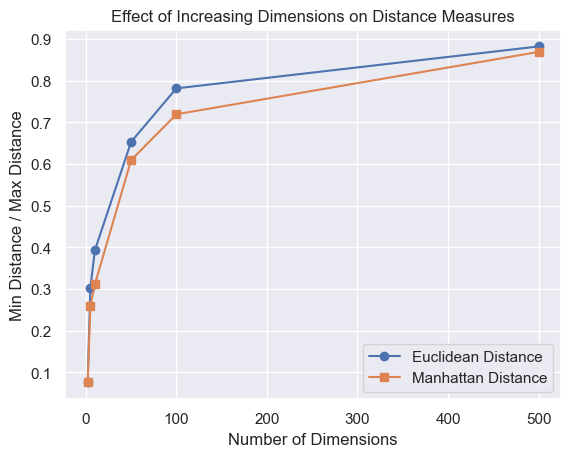

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random points in increasing dimensions
dims = [2, 5, 10, 50, 100, 500]
euclidean_ratios = []
manhattan_ratios = []

for d in dims:
    np.random.seed(42)
    points = np.random.rand(1000, d)  # 1000 random points in d-dimensional space
    dists_euclidean = []
    dists_manhattan = []
    
    for i in range(100):
        A, B = points[np.random.choice(points.shape[0], 2, replace=False)]
        dists_euclidean.append(np.linalg.norm(A - B))  # Euclidean
        dists_manhattan.append(np.sum(np.abs(A - B)))  # Manhattan

    # Compute ratio of min to max distance
    euclidean_ratios.append(np.min(dists_euclidean) / np.max(dists_euclidean))
    manhattan_ratios.append(np.min(dists_manhattan) / np.max(dists_manhattan))

# Plot results
plt.plot(dims, euclidean_ratios, label="Euclidean Distance", marker='o')
plt.plot(dims, manhattan_ratios, label="Manhattan Distance", marker='s')
plt.xlabel("Number of Dimensions")
plt.ylabel("Min Distance / Max Distance")
plt.legend()
plt.title("Effect of Increasing Dimensions on Distance Measures")
plt.show()

This code demonstrates how the relative spread of distances between points changes as the number of dimensions increases. Here's what it reveals:

As the number of dimensions increases, the distances between points (both Euclidean and Manhattan) tend to spread out more.

Min/Max distance ratio (how small distances compare to large distances):

In low dimensions (like 2 or 5), distances vary more significantly. You'll find smaller distances that are much smaller than the largest distances.

In high dimensions (like 100 or 500), the distances tend to become more uniform, meaning the minimum and maximum distances get closer, leading to a lower ratio.

In simpler terms:

In high-dimensional spaces, distances between points become more similar, and it's harder to distinguish small from large distances.

In low-dimensional spaces, there's more variation between distances, so it's easier to identify which points are very close or far apart.

Conclusion:
This plot helps us visualize the curse of dimensionality, where, as dimensions increase, the concept of "closeness" between points becomes less meaningful. The ratio of the smallest to largest distance tends to shrink as the space gets larger.